In [1]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(clusterProfiler)
library(openxlsx)
library(ggpubr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




clusterProfiler v4.0.5  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141. doi: 10.1016/j.xinn.2021.100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [37]:
data = readRDS('./results/Step1_allCluster/Filtered_merged.rds')

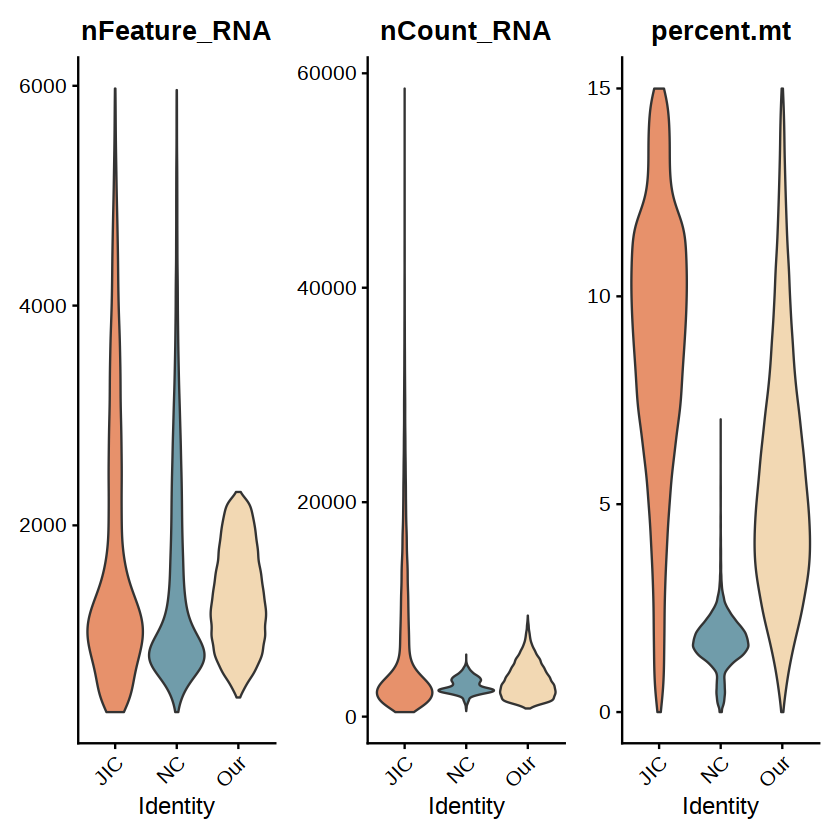

In [30]:
VlnPlot(data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,
        cols=c('#E7916B','#709CAA','#F2D8B3'),
        pt.size=0,group.by = 'dataset')

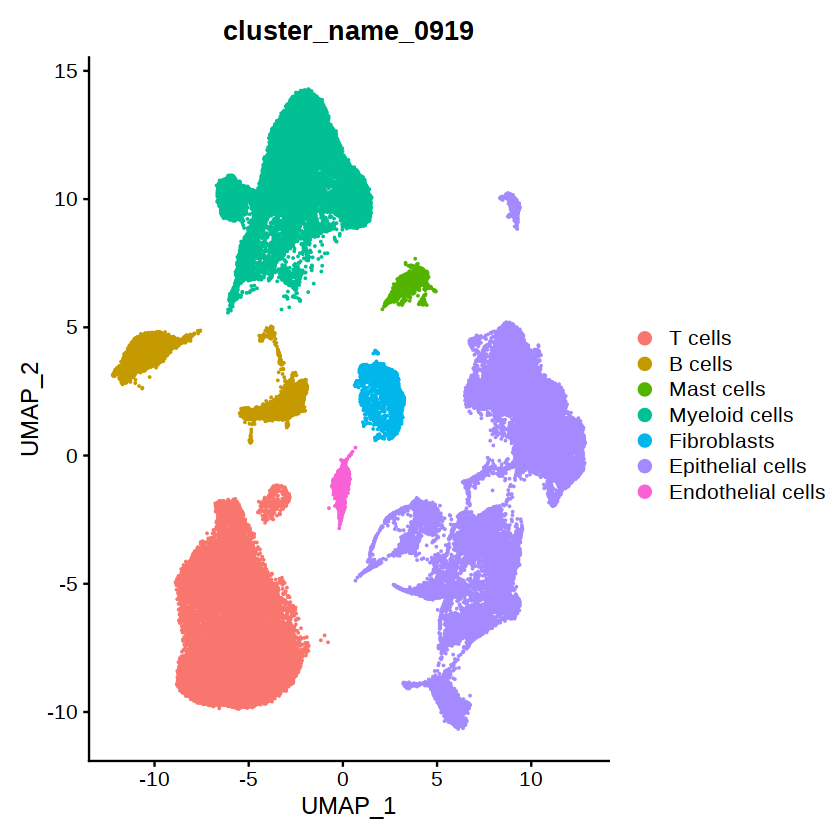

In [39]:
DimPlot(data,group.by = 'cellTypes_major')   # major cell type

In [5]:
scanvi_color = read.csv('./results/Step1_allCluster/color_scANVI.csv',row.names = 2)
scanvi_color

,X,color
,<int>,<chr>
Alveolar cell type 1,0,#023fa5
Alveolar cell type 2,1,#7d87b9
B cell,2,#bec1d4
Ciliated,3,#d6bcc0
Club,4,#bb7784
DC mature,5,#8e063b
Endothelial cell,6,#4a6fe3
Macrophage,7,#8595e1
Macrophage alveolar,8,#b5bbe3


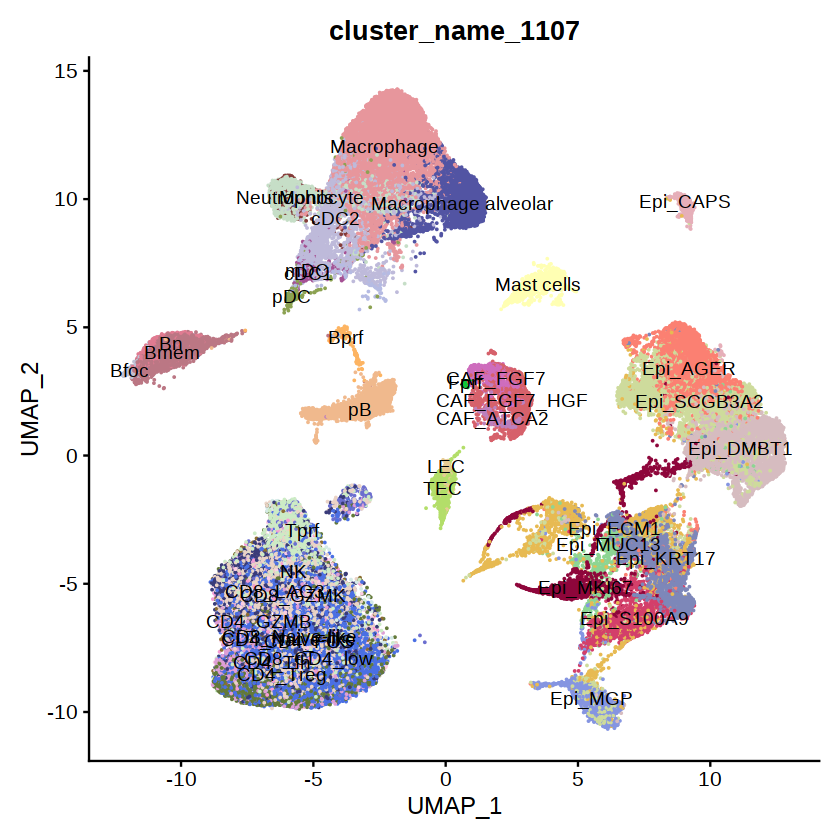

In [18]:
DimPlot(data,group.by = 'cellTypes_subsets',label = T) +
       NoLegend()

Warning message:
“Ignoring unknown parameters: stat”


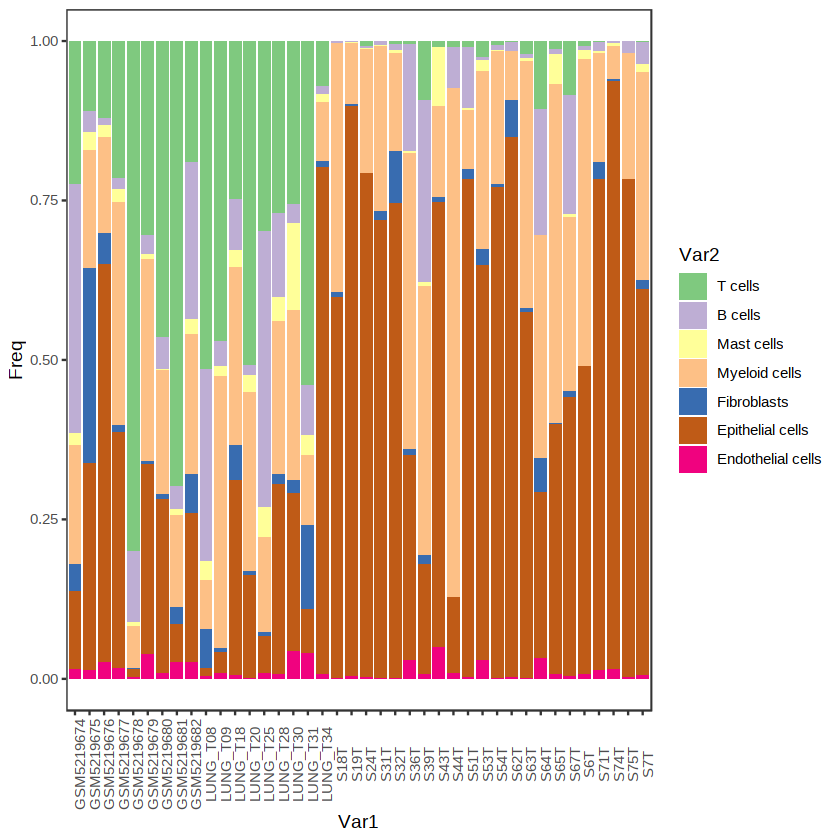

In [43]:
plot_data = as.data.frame(prop.table(table(data$Patients, data$cellTypes_major)))
plot_data$Var1 = factor(plot_data$Var1)
ggplot(plot_data, aes( x = Var1,y=Freq,fill = Var2))+
  geom_col(stat='identity',position="fill", width=0.82)+
  #geom_bar(position = "stack", stat = "identity", width = 0.6) 
  theme_bw() + theme(panel.grid=element_blank(),axis.text.x = element_text(angle=90))+
scale_fill_manual(values = celltype_col)

In [39]:
print(sum(data$cluster_name_0919 == 'Fibroblasts'))
print(sum(data$cluster_name_0919 %in% c('Fibroblasts','Endothelial cells')))
sum(data$cluster_name_0919 == 'Fibroblasts')/sum(data$cluster_name_0919 %in% c('Fibroblasts','Endothelial cells'))

[1] 2417
[1] 3519


[1] 0.6868429

In [54]:
print(sum(data$cellTypes_major %in% c('T cells','Myeloid cells')))
print(sum(data$cellTypes_major %in% c('T cells','B cells','Myeloid cells','Mast cells')))
sum(data$cellTypes_major ==  'T cells')/sum(data$cellTypes_major %in% c('T cells','B cells','Myeloid cells','Mast cells'))

[1] 37842
[1] 46352


[1] 0.4142648

In [56]:
sum(data$cellTypes_major == 'Myeloid cells')+sum(data$cellTypes_major ==  'T cells')

[1] 37842

In [44]:
print(sum(data$cellTypes_major == 'Myeloid cells')/sum(data$cellTypes_major %in% c('T cells','B cells','Myeloid cells','Mast cells'))+
      sum(data$cellTypes_major ==  'T cells')/sum(data$cellTypes_major %in% c('T cells','B cells','Myeloid cells','Mast cells'))
     )

[1] 0.8164049


In [57]:
plot1 = data.frame(prop = c(sum(data$cellTypes_major == 'Fibroblasts'),
                            sum(data$cellTypes_major %in% c('Endothelial cells'))),
                   group = c('Fibroblasts','Other stromal cells\n(Endothelial cells)')
                  )

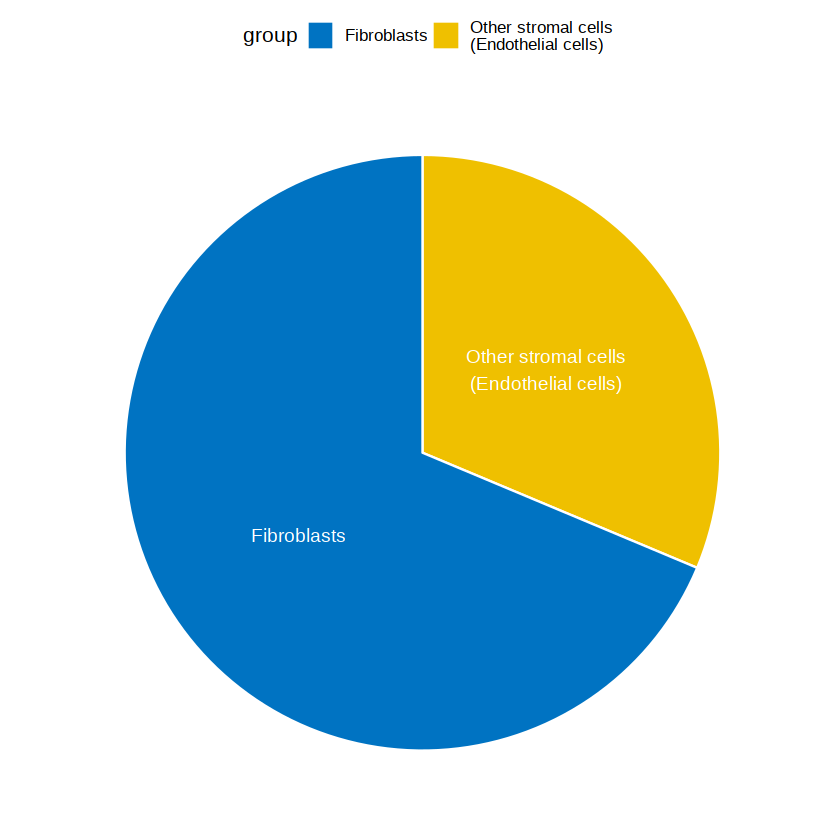

In [58]:
library(ggpubr)
p1 = ggpie(plot1, 'prop',  #绘图，只用写频数就行，切记不用再写分组
      fill = 'group', palette = 'jco', #按照Cylinders填充，颜色板为jco.
      label = plot1$group, lab.pos = 'in', lab.font = c(4, 'white'),
      color = "white"
     ) #设置标签，标签的位置在图的内部，标签的大小为4， 颜色为白色.
p1

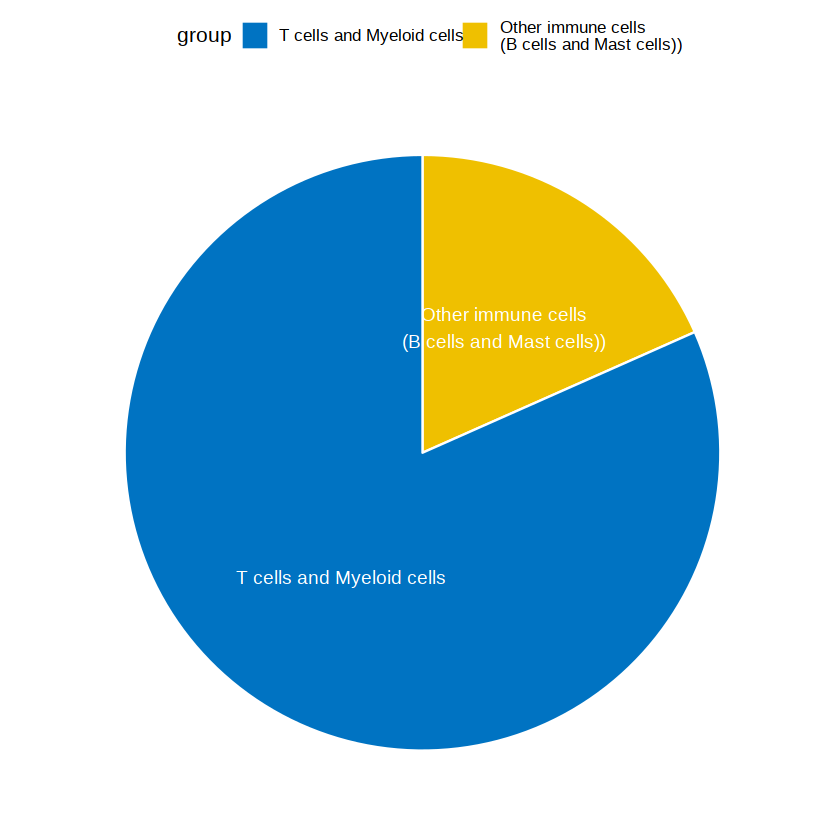

In [59]:
plot2 = data.frame(prop = c(sum(data$cellTypes_major %in% c('T cells','Myeloid cells')),
                            sum(data$cellTypes_major %in% c('B cells','Mast cells'))),
                   group = c('T cells and Myeloid cells','Other immune cells\n(B cells and Mast cells))')
                  )
plot2$group = factor(plot2$group, levels = c('T cells and Myeloid cells','Other immune cells\n(B cells and Mast cells))'))
p2 = ggpie(plot2, 'prop',  #绘图，只用写频数就行，切记不用再写分组
      fill = 'group', palette = 'jco', #按照Cylinders填充，颜色板为jco.
      label = plot2$group, lab.pos = 'in', lab.font = c(4, 'white'),
      color = "white"
     )
p2

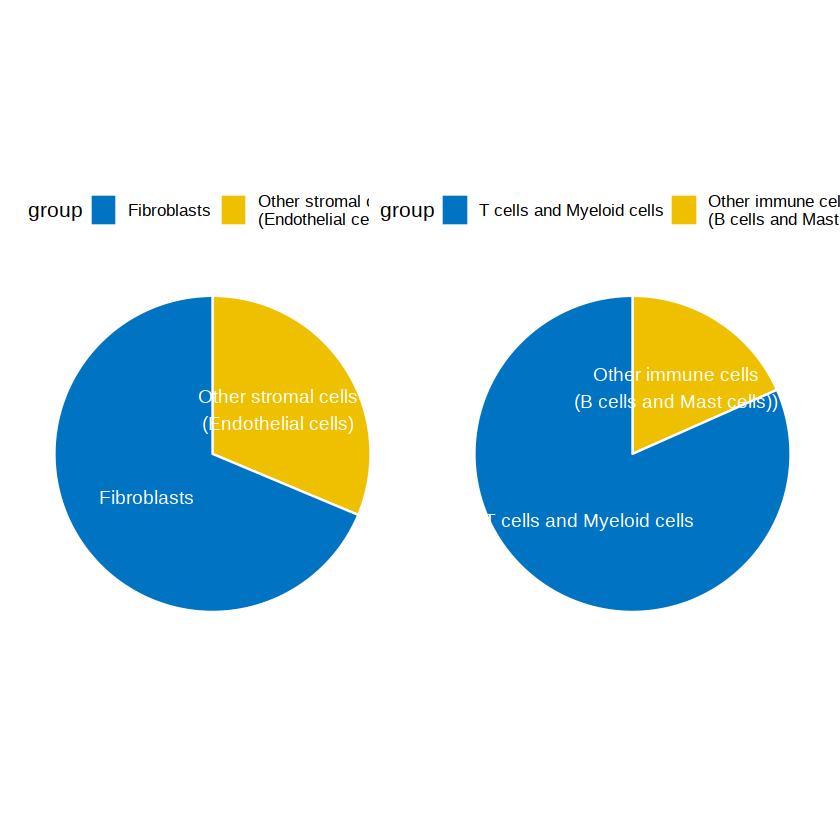

In [60]:
library(cowplot)
plot_grid(p1,p2)

In [32]:
markers = c(
    'CD3D','CD3E','CD2',  ## T/NK  
     'CD79A','JCHAIN','MS4A1', ## B/plasma 
    'MS4A2','CPA3','TPSB2',   ## Mast  
    'CD14','C1QA','APOE', ## Mye
    'DCN','COL1A2','LUM',  ## Fibroblast
    'EPCAM','KRT18','KRT19',  ## Epi
    'PECAM1','CLDN5','CDH5' ## Endo
        
)


#options(repr.plot.width=9, repr.plot.height=4)
pdf('./results/figures/published/Figure1/majorMarkers_dotplot.pdf',width=9,height=3.1)
DotPlot(data,features = markers,group.by = 'cellTypes_major',
        cols = c("lightgrey", "Brown3"))+ theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

png 
  2

In [22]:
mergeData = function(mat, 
                     meta, 
                     clusterCol_name, 
                     type = 'mean'){
  meta = meta[colnames(mat),]
  res = vector(mode = 'list',length = length(unique(meta[,`clusterCol_name`])))
  names(res) = unique(meta[,`clusterCol_name`])
  for(x in unique(meta[,`clusterCol_name`])){
    sub_mat = as.matrix(mat[,which(meta[,`clusterCol_name`] == x)])
    if(type == 'mean'){
      res[[x]] = rowMeans(sub_mat)
    }else if(type == 'mean_expressed'){
      sub_mat[which(sub_mat == 0)] = NA
      res[[x]] = rowMeans(sub_mat, na.rm = TRUE)
    }else if(type == 'median'){
      res[[x]] = apply(sub_mat, 1, median)
    }
  }
  res = do.call('cbind',res)
  res[is.na(res)] = 0
  res
}

In [13]:
merged = mergeData(data@assays$RNA@data,
                         data@meta.data,
                         'cluster_name_1107'
                        )
head(merged)

,Macrophage alveolar,Epi_CAPS,Epi_AGER,Monocyte,Epi_SCGB3A2,Macrophage,cDC2,Mast cells,Epi_KRT17,TEC,⋯,CD4_Tfh,Neutrophils,CD4_Treg,CD8_GZMK,NK,CD8_LAG3,CD4_Naive-like,CD4_FOS,CD8_Naive-like,CD4_GZMB
A2M,0.399073441,0.031384558,0.160346393,0.1137346145,0.251918283,1.476901057,0.624409602,0.072974898,0.054079084,2.391438696,⋯,0.038978387,0.013090881,0.0472441645,0.057264074,0.05181098,0.04365959,0.032768580,0.037556584,0.03740372,0.017649782
A2M-AS1,0.007017666,0.008463905,0.004727262,0.0042677591,0.003154421,0.007740098,0.003869171,0.084044212,0.002881793,0.010704601,⋯,0.017525996,0.000000000,0.0072127601,0.036187209,0.02529993,0.01882883,0.009455976,0.008292396,0.01232118,0.000000000
A4GALT,0.030311958,0.040613924,0.040477551,0.0006903838,0.011077751,0.004227514,0.004475671,0.002293321,0.121576025,0.228613120,⋯,0.001941668,0.002344072,0.0090767229,0.002491528,0.01249178,0.00000000,0.001006993,0.006812054,0.00000000,0.001652333
AAAS,0.089832998,0.085318341,0.094999082,0.0397531056,0.079944994,0.080790833,0.072385813,0.053687284,0.094042923,0.079444995,⋯,0.052458839,0.037251287,0.0604888917,0.051988769,0.05170029,0.05046462,0.055086227,0.051845565,0.04123410,0.054778872
AACS,0.051059381,0.052346179,0.098582403,0.0192296318,0.057798875,0.036489119,0.045294993,0.025828263,0.152647189,0.026795612,⋯,0.028598716,0.008641360,0.0324317602,0.027883715,0.03156490,0.03452560,0.029448778,0.025274077,0.03449058,0.039422722
AADAT,0.001945949,0.064146864,0.047799700,0.0027037030,0.039079395,0.001565804,0.004410816,0.003467636,0.022455455,0.007733929,⋯,0.000000000,0.009728733,0.0009805318,0.000000000,0.00000000,0.00000000,0.000000000,0.001777772,0.00000000,0.000000000


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


[1] "Del19" "WT"    "L858R"
[1] 40  2


Warning message in geom_signif(mapping = aes(x = group_mutation, y = freq), manual = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Warning message in wilcox.test.default(c(0.224576271186441, 0.121607694950189, 0.30520878174774, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.224576271186441, 0.121607694950189, 0.30520878174774, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.21520381931693, 0.000846023688663283, :
“cannot compute exact p-value with ties”
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Warning message in wilcox.test.default(c(0.0180084745762712, 0.0192373754723463, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.defaul

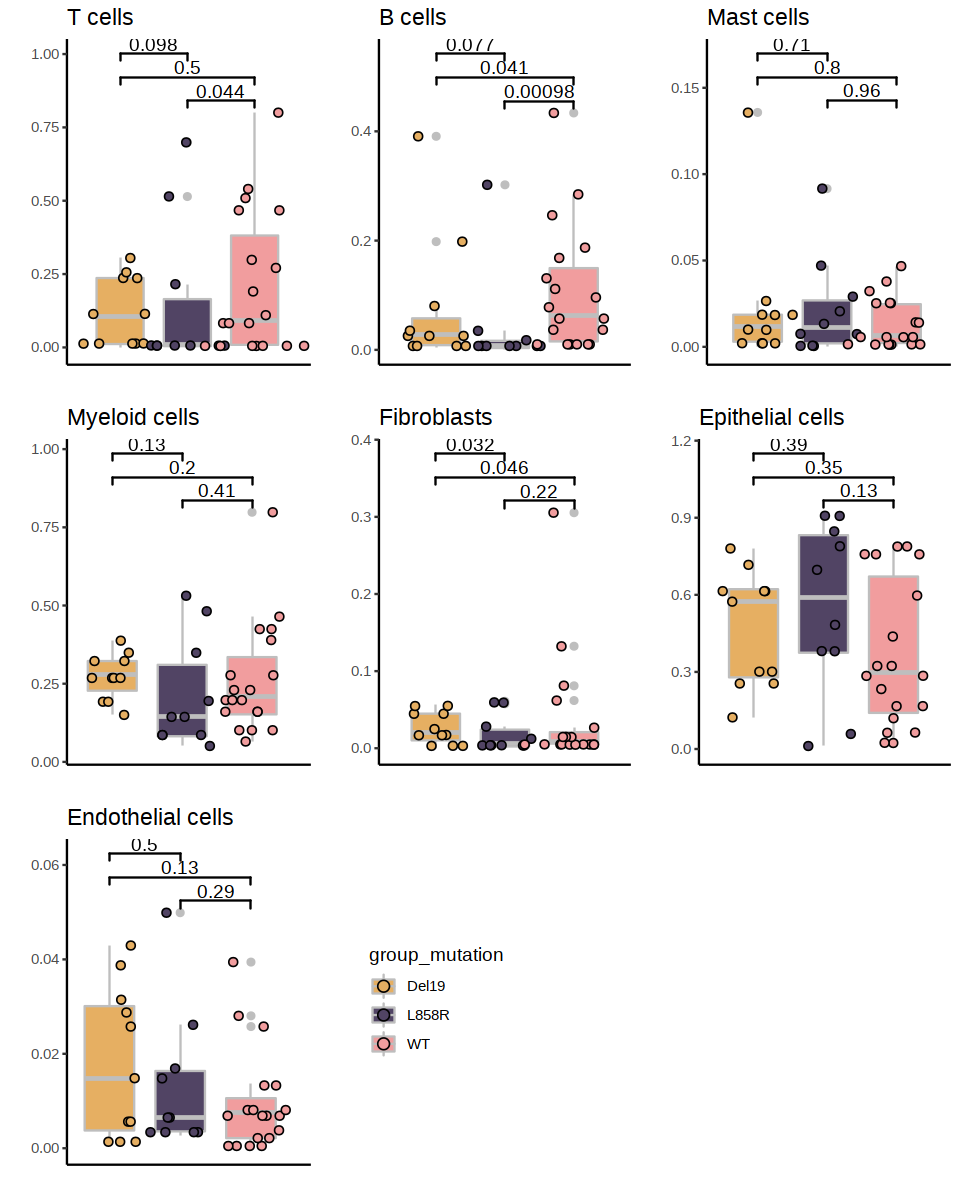

In [13]:
filter_outilers = function(data, col_lab){
    qq = quantile(data[, col_lab])
    A = qq[2] - 1.5*(qq[4] - qq[2])
    B = qq[4] + 1.5*(qq[4] - qq[2])
    data = data[which(data[,col_lab]<=B),]
    data = data[which(data[,col_lab]>=A),]
    return(data)
}
library(ggsignif)
library(cowplot)

meta = data@meta.data
prop.mat = as.matrix(table(meta$Patients, meta$cellTypes_major))
prop.mat = prop.mat/rowSums(prop.mat)
prop.mat = as.data.frame(prop.mat)

m1 = unique(meta$Patients[which(meta$mutation == 'L858R')])
m2 = unique(meta$Patients[which(meta$mutation == 'Del19')])

mutation = rep('WT', nrow(prop.mat))
mutation[which(prop.mat[,'Var1'] %in% m1)] = 'L858R'
mutation[which(prop.mat[,'Var1'] %in% m2)] = 'Del19'
prop.mat = cbind(prop.mat, mutation)
colnames(prop.mat) = c(colnames(prop.mat)[1:3], 'mutation')

compaired = list(c('L858R','WT'),c('Del19','WT'),c('Del19','L858R'))
i=1
cellTypes = unique(prop.mat$Var2)
plots = vector(mode='list',length = length(cellTypes))
names(plots) = cellTypes
for(c in cellTypes){
    plot_temp = data.frame(freq = prop.mat$Freq[which(prop.mat$Var2 == c)], 
                           group_mutation = prop.mat[which(prop.mat$Var2 == c),'mutation'])
    plot_temp = na.omit(plot_temp)
    print(unique(plot_temp$group_mutation))
    print(dim(plot_temp))
    
    sigf_data = lapply(unique(plot_temp$group_mutation),function(g){
        filter_outilers(plot_temp[which(plot_temp$group_mutation == g),], 'freq')
    })
    sigf_data = do.call('rbind',sigf_data)
    
    p = ggplot(plot_temp, aes(x=group_mutation,y=freq,fill =group_mutation ))+
        geom_boxplot(aes(color=group_mutation),width=0.7)+
        geom_dotplot(binaxis = "y",
               stackdir = "center",
               position="jitter")+
         ggtitle(c)+
      ylab("")+xlab("")+
      theme_bw()+theme(
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.line.x.bottom = element_line(),
        axis.line.y.left = element_line(),
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
        legend.position = c(1.5,0.5)
      )+
      scale_fill_manual(values = c('#E6AF62','#514464', '#F19D9E'))+
      scale_color_manual(values = c("gray", "gray",'gray'))+
      geom_signif(mapping = aes(x=group_mutation,y=freq), 
                  manual = F,
                  data = sigf_data, inherit.aes=F,step_increase = 0.1,
                  comparisons = compaired )
    if(i < length(cellTypes)){
      p = p+NoLegend()
    }
    i=i+1
    plots[[c]] = p
}
options(repr.plot.width=8, repr.plot.height=10)
plot_grid(plotlist = plots,ncol = 3)

In [18]:
library(sys)

In [23]:
packageVersion("Seurat")

[1] ‘5.0.0’

In [3]:
eri = read.csv('./results/scissor/jaccard_alpha_1e-4.csv',row.names = 1)
eri

,index,celltype
,<dbl>,<chr>
Myeloid cells,0.3920802,Myeloid cells
Epithelial cells,0.3168357,Epithelial cells
Mast cells,0.7344262,Mast cells
Endothelial cells,0.7693452,Endothelial cells
B cells,0.7586882,B cells
Fibroblasts,0.8938429,Fibroblasts
T cells,0.8243886,T cells


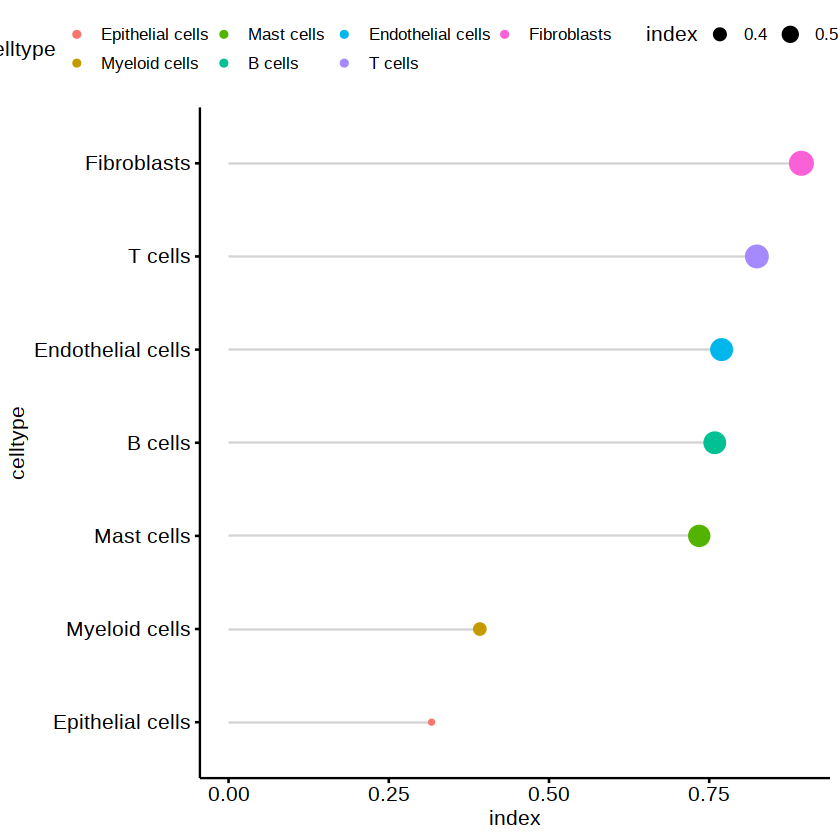

In [7]:
ggdotchart(eri, x = "celltype", y = "index",
           color = "celltype",                                # Color by groups
           sorting = "descending",                        # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           ggtheme = theme_pubr(),
           rotate = T,
           dot.size = "index"
           )

In [11]:
print(length(unique(data$Sample_Id)))
print(unique(data$Smoking))
print(unique(data$Gender))
print(unique(data$Mutation))

[1] 22
[1] 0 1
[1] M F
Levels: F M
[1] "L858R" "Del19" "WT"   


In [12]:
print(unique(data$Stage))

[1] "IA"   "IIIA" "IB"   "IIB" 


In [63]:
markers = c(
    'CD3D','CD3E','CD2',  ## T/NK  
    'CD14','C1QA','APOE', ## Mye
    'MS4A2','CPA3','TPSB2',   ## Mast
    'DCN','COL1A2','LUM',  ## Fibroblast
    'EPCAM','KRT18','KRT19',  ## Epi
    'PECAM1','CLDN5','CDH5', ## Endo
    'CD79A','JCHAIN','MS4A1' ## B/plasma        
)

In [60]:
Idents(data) = factor(data$anno_zyr2,levels = sort(unique(data$anno_zyr2)))

In [71]:
markers = c(
    'CD3D','CD3E','CD2',  ## T/NK  
    'CD14','C1QA','APOE', ## Mye
    'MS4A2','CPA3','TPSB2',   ## Mast
    'DCN','COL1A2','LUM',  ## Fibroblast
    'EPCAM','KRT18','KRT19',  ## Epi
    'PECAM1','CLDN5','CDH5', ## Endo
    'CD79A','JCHAIN','MS4A1' ## B/plasma        
)


#options(repr.plot.width=9, repr.plot.height=4)
pdf('./results/figures/mainFigures/figure1_dotplot_majorMarkers.pdf',width=9,height=3.1)
DotPlot(data,features = markers,cols = c("lightgrey", "Brown3"))+ theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

png 
  2

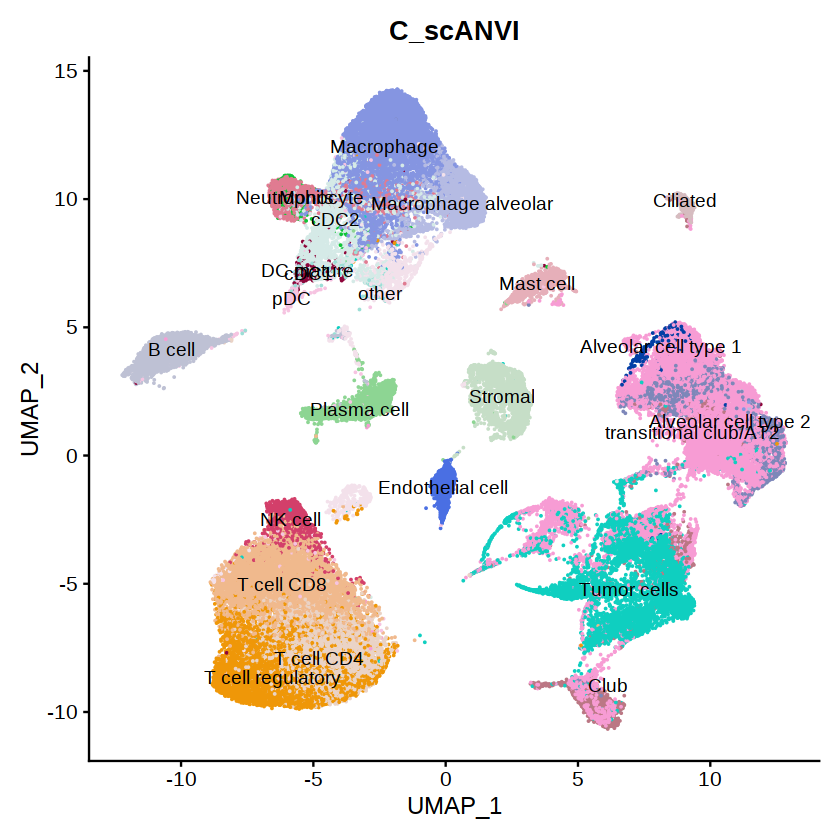

In [16]:
options(repr.plot.width=7, repr.plot.height=7)
DimPlot(data,group.by = 'C_scANVI',cols = scanvi_color[sort(unique(data$C_scANVI)), 'color'],label = T)+NoLegend()

Warning message:
“Ignoring unknown parameters: stat”


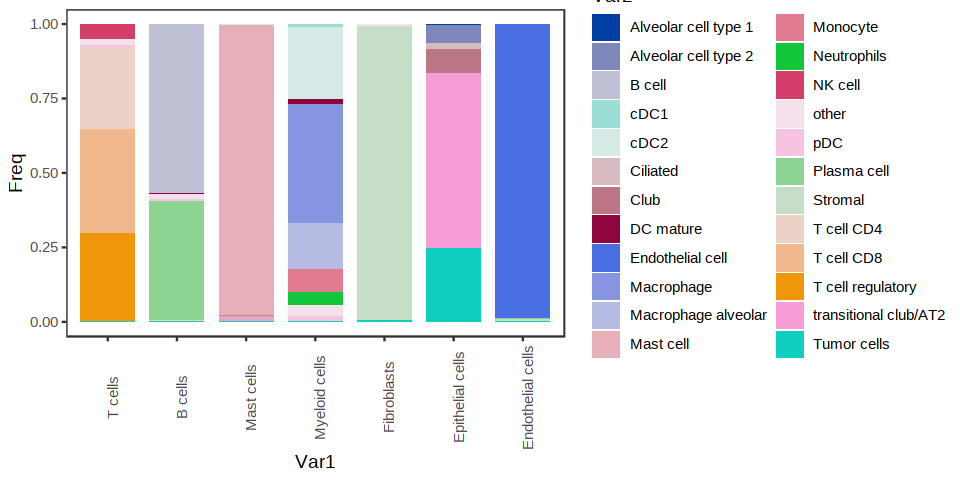

In [21]:
meta = data@meta.data
options(repr.plot.width=8, repr.plot.height=4)
plot_data = as.data.frame(prop.table(table(meta$cellTypes_major, meta$C_scANVI)))
ggplot(plot_data, aes( x = Var1,y=Freq,fill = Var2))+
  geom_col(stat='identity',position="fill", width=0.78)+
  #geom_bar(position = "stack", stat = "identity", width = 0.6) 
  theme_bw() + theme(panel.grid=element_blank(),axis.text.x = element_text(angle=90))+
scale_fill_manual(values = scanvi_color[sort(unique(data$C_scANVI)), 'color'])